In [ ]:
!unzip /Dataset.zip

In [9]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [10]:
IMAGE_SIZE = [224, 224]

train_path = './Dataset/Train'
test_path = './Dataset/Test'

In [11]:
vgg19 = VGG19(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top = False)

for layer in vgg19.layers:
    layer.trainable = False

In [12]:
classes = glob('Dataset/Train/*')

no_of_classes = len(classes)

In [13]:
# vgg19.summary()

In [ ]:
x = Flatten()(vgg19.output)

output = Dense(no_of_classes, activation='softmax')(x)

model = Model(inputs = vgg19.input, outputs = output)

model.summary()

In [16]:
model.compile(
loss = 'categorical_crossentropy', 
optimizer = 'adam', 
metrics = ['accuracy'])

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [18]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/25
13/13 [==============================] - 8s 607ms/step - loss: 1.6879 - accuracy: 0.5048 - val_loss: 1.5704 - val_accuracy: 0.3284
Epoch 2/25
13/13 [==============================] - 8s 592ms/step - loss: 0.6140 - accuracy: 0.6827 - val_loss: 0.5266 - val_accuracy: 0.7090
Epoch 3/25
13/13 [==============================] - 8s 593ms/step - loss: 0.4092 - accuracy: 0.8101 - val_loss: 0.4955 - val_accuracy: 0.7388
Epoch 4/25
13/13 [==============================] - 8s 593ms/step - loss: 0.3734 - accuracy: 0.8413 - val_loss: 0.5269 - val_accuracy: 0.7164
Epoch 5/25
13/13 [==============================] - 8s 592ms/step - loss: 0.3324 - accuracy: 0.8462 - val_loss: 0.4084 - val_accuracy: 0.7388
Epoch 6/25
13/13 [==============================] - 8s 592ms/step - loss: 0.3180 - accuracy: 0.8750 - val_loss: 0.5119 - val_accuracy: 0.7239
Epoch 7/25
13/13 [==============================] - 8s 591ms/step - loss: 0.2864 - accuracy: 0.8822 - val_loss: 0.3668 - val_accuracy: 0.8060
Epoch 

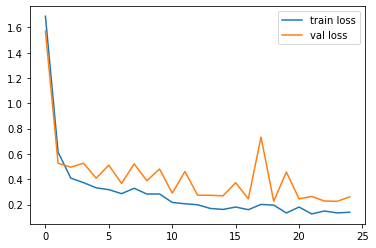

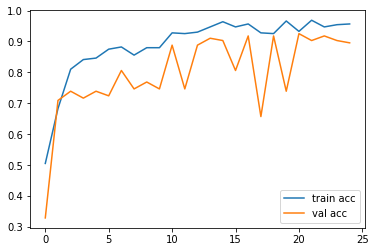

<Figure size 432x288 with 0 Axes>

In [22]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('/LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('/AccVal_acc')

In [21]:
model.save('/model_vgg19.h5')

In [23]:
y_pred = model.predict(test_set)

In [24]:
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1])

In [26]:
model=load_model('/model_vgg19.h5')

In [28]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [ ]:
x = image.img_to_array(img)

In [32]:
x.shape

(224, 224, 3)

In [33]:
x = x/255

In [34]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [35]:
model.predict(img_data)

array([[0.5896471, 0.4103529]], dtype=float32)

In [36]:
a=np.argmax(model.predict(img_data), axis=1)

if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
